## Data Cleaning and Feature Analysis


In [1]:
import pymysql
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine 

%matplotlib inline

<b> Increase the size of the screen to view more features </b>

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<b> Decrypt the credentials </b>

In [3]:
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

<b> Connect to the Database </b>

In [4]:
#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

<b> Obtain the data from the Database </b>

In [5]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM songs_instance', con = conn)
print("--- %s seconds ---" % (time.time() - start_time))
df.head(15)

--- 1.6876747608184814 seconds ---


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,genre,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0.624,0.788,0,-8.207,1,0.730,274.355,120.658,3,1.000,3638.1,2970.3,9.60,99.58,12.76,Rock,0,0,0,0,0,0,1,0,0,93,0,0,0,0,0,0,0,0,1,0,0,0,5,23,887,3,0.843041,0.568304,ORIGINAL,1983
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,0.213,0.435,4,-5.906,0,0.399,222.586,119.888,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Pop,0,0,0,0,0,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1984
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,0.398,0.427,9,-6.061,0,0.298,360.240,115.613,4,0.868,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,88,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1983
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,0.000,0.930,1,-8.687,1,0.791,276.962,112.747,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Soul,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,0,0,0,1,0,7,11,657,2,0.757921,0.600265,ORIGINAL,1984
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,0.311,0.364,10,-13.811,0,0.362,381.515,131.183,4,0.000,2862.5,2317.5,7.18,82.38,20.70,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30,1985-09-07,1985,1986-01-25,1986,1980,253,0.305,0.631,3,-12.894,0,0.629,247.130,87.268,4,0.709,4346.7,3516.3,7.19,107.60,10.72,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.823576,0.590181,ORIGINAL,1985
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27,1974-08-03,1974,1974-12-07,1974,1970,203,0.194,0.409,10,-11.170,0,0.326,194.258,102.516,4,0.554,1548.8,1249.3,5.64,49.32,16.63,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.757921,0.600265,ORIGINAL,1974
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26,1983-01-22,1983,2014-06-07,2014,1980,383,0.154,0.461,9,-5.038,0,0.487,367.926,117.032,4,0.533,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,73,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.866520,0.766545,ORIGINAL,1983
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25,1979-11-03,1979,1980-04-12,1980,1970,204,0.108,0.269,11,-6.029,1,0.767,196.034,114.547,4,0.507,2632.1,2078.2,5.85,72.58,17.07,Pop,0,0,0,0,0,0,0,0,0,76,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.855245,0.899992,ORIGINAL,1979
9,TRXHRYZ128F4264957,1302,Don't Stop 'til You Get Enough,Michael Jackson,21,1,98,1,6,9,10,12,13,38,1979-07-28,1979,1979-12-15,1979,1970,367,2.583,0.585,11,-4.222,1,0.680,347.945,119.235,4,0.472,2632.1,2078.2,5.85,72.58,17.07,Pop,0,0,0,0,0,0,0,0,0,87,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.866520,0.899992,ORIGINAL,1979


<B> Describe the dataset </B>

In [28]:
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,is_top10,is_top40,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,0.169971,0.379111,0.006691,0.067646,0.026275,0.000326,0.029621,0.022358,0.006528,0.067156,0.137087,0.019502,0.002285,0.045777,0.049857,0.368666,0.031089,0.002856
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,0.375623,0.485185,0.081529,0.251147,0.159958,0.018064,0.169545,0.147852,0.080535,0.250303,0.343953,0.138288,0.047747,0.209010,0.217659,0.482463,0.173566,0.053367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,9.000000,-6.260500,1.000000,141.956000,4.000000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,249.559006,7.000000,19.000000,86.000000,887.000000,3.000000

### Handling missing samples

In [29]:
#mean_last_pos = df['Last_Position'].mean()
#print(mean_last_pos)
print(df.shape)
values = {'Last_Position': 0, 'number_1s': 0, 'weeks_at_number_1': 0}
df.fillna(value=values, inplace=True)
df.describe()

(12255, 53)


,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,is_top10,is_top40,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,0.169971,0.379111,0.006691,0.067646,0.026275,0.000326,0.029621,0.022358,0.006528,0.067156,0.137087,0.019502,0.002285,0.045777,0.049857,0.368666,0.031089,0.002856
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,0.375623,0.485185,0.081529,0.251147,0.159958,0.018064,0.169545,0.147852,0.080535,0.250303,0.343953,0.138288,0.047747,0.209010,0.217659,0.482463,0.173566,0.053367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,9.000000,-6.260500,1.000000,141.956000,4.000000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,249.559006,7.000000,19.000000,86.000000,887.000000,3.000000

### Drop older loaded genre columns

In [8]:
df.drop(['end_of_fade_in','key_confidence','mode_confidence','start_of_fade_out','time_signature_confidence','GrossDomesticProduct',\
         'PersonalIncome','Unemployment_Rate_Year_AVG','Adjusted_CPI_Year_AVG','Misery_Index_Year_AVG','Blues',  'ChildrensMusic', \
         'Christian_Gospel', 'Christmas', 'Comedy', 'Country_', 'Folk', 'House_Electronic_Trance', 'Jazz', 'Latin', 'Metal', 'Pop_Standards', \
         'Pop', 'Punk', 'R_And_B', 'Rap_Hip_Hop', 'Rock_And_Roll', 'Rock', 'Ska_Reggae_Dancehall', 'Soul', 'Soundtrack'],axis=1, inplace=True)
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,9.000000,-6.260500,1.000000,141.956000,4.000000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,249.559006,7.000000,19.000000,86.000000,887.000000,3.000000,1.000000,1.082500,2018.000000


### Generate Dummy Columns to include Genre (categorical) in the analysis

In [11]:
genres = pd.get_dummies(df['genre'],prefix='gnr',dummy_na=False)
genres.head()

,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,gnr_Soul
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Drop the Last One to avoid self cancellation

In [12]:
genres.drop(['gnr_Soul'],axis =1,inplace=True)
genres.head()

,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Adding Target Features

In [15]:
df['is_top10'] = np.where(df['weeks_top_10']>0,1,0)
df['is_top40'] = np.where(df['weeks_top_40']>0,1,0)
df.head()

,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,genre,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,is_top10,is_top40
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0,-8.207,1,120.658,3,Rock,93,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,1,1
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,4,-5.906,0,119.888,4,Pop,94,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,1,1
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,9,-6.061,0,115.613,4,Pop,88,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,0,1
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,1,-8.687,1,112.747,4,Soul,93,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,1,1
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,10,-13.811,0,131.183,4,Soul,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,1,1


### Concat Genre Columns

In [19]:
df = pd.concat([df,genres],axis=1)
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,is_top10,is_top40,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,0.169971,0.379111,0.006691,0.067646,0.026275,0.000326,0.029621,0.022358,0.006528,0.067156,0.137087,0.019502,0.002285,0.045777,0.049857,0.368666,0.031089,0.002856
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,0.375623,0.485185,0.081529,0.251147,0.159958,0.018064,0.169545,0.147852,0.080535,0.250303,0.343953,0.138288,0.047747,0.209010,0.217659,0.482463,0.173566,0.053367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,9.000000,-6.260500,1.000000,141.956000,4.000000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,249.559006,7.000000,19.000000,86.000000,887.000000,3.000000

### Feature seleccion through regularization

In [20]:
print(df.columns)

Index(['trackid', 'bill_popularity', 'song', 'artist', 'weeks_ranked', 'highest_rank', 'lowest_rank', 'weeks_top_spot', 'weeks_top_10', 'weeks_top_20', 'weeks_top_30', 'weeks_top_40', 'weeks_top_50', 'average_rank', 'first_appearance', 'year_first_appear', 'last_appearance', 'year_last_appear', 'decade', 'duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', 'genre', 'Last_Position', 'number_1s', 'weeks_at_number_1', 'chart_appearances', 'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'origin_source', 'year_added', 'is_top10', 'is_top40', 'gnr_Blues', 'gnr_Country', 'gnr_Folk', 'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk', 'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall'], dtype='object')


In [21]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [54]:
features = df[['decade', 'duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', \
             'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Blues', 'gnr_Country', 'gnr_Folk', \
            'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk',\
            'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall']]
labels = df[['is_top40']]
print(len(features))
list(features)

12255


['decade',
 'duration',
 'key_song',
 'loudness',
 'mode',
 'tempo',
 'time_signature',
 'speed_general',
 'artist_familiarity',
 'artist_hotttnesss',
 'gnr_Blues',
 'gnr_Country',
 'gnr_Folk',
 'gnr_Funk',
 'gnr_House Electronic Trance',
 'gnr_Jazz',
 'gnr_Latin',
 'gnr_Metal',
 'gnr_Pop',
 'gnr_Pop Standards',
 'gnr_Punk',
 'gnr_Rap Hip Hop',
 'gnr_Rhythm and Blues',
 'gnr_Rock',
 'gnr_Rock and Roll',
 'gnr_Ska Reggae Dancehall']

In [55]:
songs = df [['decade', 'duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', \
             'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Blues', 'gnr_Country', 'gnr_Folk', \
            'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk',\
            'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall','is_top40']]
songs.head()

,decade,duration,key_song,loudness,mode,tempo,time_signature,speed_general,artist_familiarity,artist_hotttnesss,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,is_top40
0,1980,286,0,-8.207,1,120.658,3,3,0.843041,0.568304,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1980,238,4,-5.906,0,119.888,4,2,0.915823,0.665577,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1980,368,9,-6.061,0,115.613,4,2,0.915823,0.665577,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1980,279,1,-8.687,1,112.747,4,2,0.757921,0.600265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1980,388,10,-13.811,0,131.183,4,3,0.757921,0.600265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
songs.shape

(12255, 27)

### Lasso (L1 Regularization)

In [59]:
model = Lasso(alpha = 0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('decade', -0.011504818916282383), ('duration', 0.00011646931468059924), ('key_song', -0.0013733897726733587), ('loudness', 0.008491720942874662), ('mode', 0.0018147708230102822), ('tempo', -0.0010114195738922004), ('time_signature', 0.016694755679435694), ('speed_general', 0.023062821880054686), ('artist_familiarity', 0.1085427656162829), ('artist_hotttnesss', 0.6753920067064324), ('gnr_Blues', -0.0), ('gnr_Country', -0.0), ('gnr_Folk', 0.009782602664557341), ('gnr_Funk', -0.0), ('gnr_House Electronic Trance', -0.13273275892278627), ('gnr_Jazz', -0.26385244270565866), ('gnr_Latin', 0.0), ('gnr_Metal', -0.22747338250145221), ('gnr_Pop', 0.059939065690470424), ('gnr_Pop Standards', 0.01080523158857127), ('gnr_Punk', 0.0), ('gnr_Rap Hip Hop', -0.03393253017174811), ('gnr_Rhythm and Blues', 0.11173567276134753), ('gnr_Rock', -0.0985730755810854), ('gnr_Rock and Roll', 0.06479343875397921), ('gnr_Ska Reggae Dancehall', 0.0)]


### Ridge Regression (L2 Regularization)

In [60]:
model = Ridge(alpha=0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('decade', [-0.011318636494904525, 0.00013422318897005685, -0.0012408174220640026, 0.008067023748433167, 0.006580127331050631, -0.0010957891317420838, 0.017285262376273838, 0.03085637461008514, 0.15264662393115203, 0.7187988316356999, -0.11057584027896276, -0.02773263813571702, 0.03270515416645938, -0.17495125711755632, -0.18293383545753159, -0.31689697411315815, 0.0579570811108417, -0.2570109333212311, 0.05044289030463489, 0.06402865746947671, 0.02890643555567911, -0.07441710417483645, 0.11906925602712504, -0.11559125329087265, 0.09416508159979865, 0.11176182772100375])]


### Elastic Net

In [62]:
model = ElasticNet(l1_ratio=0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('decade', -0.010281897558108514), ('duration', 5.239446527895822e-05), ('key_song', -0.001547021126696619), ('loudness', 0.010804275477425096), ('mode', 0.001045632782618509), ('tempo', -0.0010045017798489017), ('time_signature', 0.012131235868790015), ('speed_general', 0.00350037528692831), ('artist_familiarity', 0.007886645494422641), ('artist_hotttnesss', 0.009590528332897738), ('gnr_Blues', -0.0), ('gnr_Country', 0.0019865898992306396), ('gnr_Folk', 0.0021197501290491903), ('gnr_Funk', -0.0), ('gnr_House Electronic Trance', -0.002907603792437499), ('gnr_Jazz', -0.005540565087456326), ('gnr_Latin', 0.0), ('gnr_Metal', -0.012814010955563431), ('gnr_Pop', 0.014543815979434912), ('gnr_Pop Standards', 0.0), ('gnr_Punk', 0.0), ('gnr_Rap Hip Hop', 0.0), ('gnr_Rhythm and Blues', 0.0066681864758398966), ('gnr_Rock', -0.013362861473350324), ('gnr_Rock and Roll', 0.002541583961523089), ('gnr_Ska Reggae Dancehall', 0.0)]


## Transformer Methods ( SelectFromModel())

In [63]:
model = Lasso(alpha = 0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['decade', 'duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', 'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Folk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll']


In [64]:
model = Ridge(alpha=0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['artist_familiarity', 'artist_hotttnesss', 'gnr_Blues', 'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Metal', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Ska Reggae Dancehall']


In [65]:
model = ElasticNet(l1_ratio=0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['decade', 'loudness', 'time_signature', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Jazz', 'gnr_Metal', 'gnr_Pop', 'gnr_Rhythm and Blues', 'gnr_Rock']


In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
sfm = SelectFromModel(model)
sfm.fit(features, labels.values.ravel())
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['decade', 'duration', 'key_song', 'loudness', 'tempo', 'artist_familiarity', 'artist_hotttnesss']


### Visualizing Importances

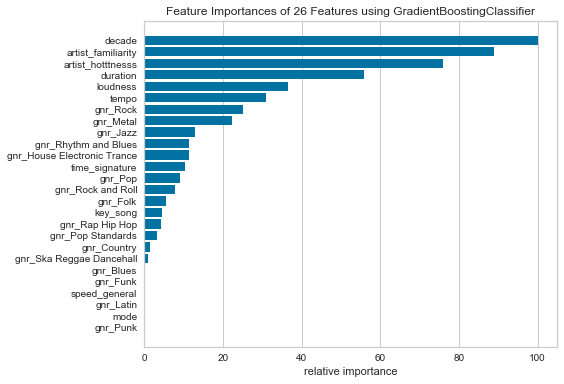

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features import FeatureImportances

model = GradientBoostingClassifier()
model.fit(features, labels.values.ravel())
model.feature_importances_

oz = FeatureImportances(GradientBoostingClassifier())
oz.fit(features, labels.values.ravel())
oz.poof()


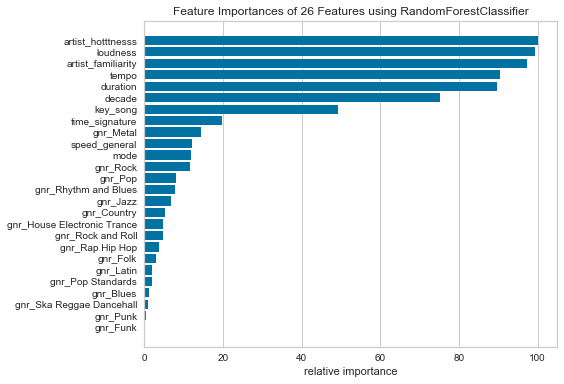

In [71]:
model = RandomForestClassifier(n_estimators=10)
model.fit(features, labels.values.ravel())
model.feature_importances_

oz = FeatureImportances(RandomForestClassifier())
oz.fit(features, labels.values.ravel())
oz.poof()